# Retail Analysis with Walmart Data

**DESCRIPTION**

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

**Dataset Description**

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

* Store - the store number
* Date - the week of sales
* Weekly_Sales -  sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate

**Holiday Events**

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

**Analysis Tasks**

**Basic Statistics tasks**

* Which store has maximum sales
* Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
* Which store/s has good quarterly growth rate in Q3’2012
* Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
* Provide a monthly and semester view of sales in units and give insights

**Statistical Model**

For Store 1 – Build  prediction models to forecast demand
* Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
* Change dates into days by creating new variable.


**###########################################################################################################**

In [1]:
#import the required modules

import numpy as np
import pandas as pd                                    # To read DataSet in DataFrame style

from datetime import datetime                          # To handle dates
import calendar                                        # To get month

from scipy import stats                                # To get Statistical function
import sklearn.metrics as metrics                      # To get regression metrics
from sklearn.linear_model import LinearRegression      # import Linear Regression module
from sklearn.linear_model import LogisticRegression    # import Logistic Regression module
from sklearn.model_selection import train_test_split   # import train_test_split for splitting data into train and test
from sklearn import preprocessing                      # import data preprocessig module

import matplotlib.pyplot as plt                        # import matplotlib for visualisation
from  matplotlib import style                          # To get plot style
import seaborn as sns                                  # import seaborn for visualisation

%matplotlib inline                                     
style.use('bmh')                                       # plot stype used 'bmh'

In [2]:
#import the Walmart Data 
walmart_data = pd.read_csv("Walmart_Store_sales.csv")
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
walmart_data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [4]:
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'],dayfirst=True)
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# create 3 seperate column for "Year", "Month" and "Quarter"
walmart_data['Year'] = walmart_data['Date'].dt.year
walmart_data['Quarter'] = walmart_data['Date'].dt.quarter
walmart_data['Month'] = walmart_data['Date'].dt.month
walmart_data['DayOfWeek'] = walmart_data['Date'].dt.dayofweek

walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,DayOfWeek
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1,2,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1,2,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,2,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,2,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1,3,4


## 1. Basic Statistics tasks :

### 1.1 Which store has maximum sales

In [6]:
#Checking for null values
walmart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Quarter         0
Month           0
DayOfWeek       0
dtype: int64

In [7]:
# the size of the data
walmart_data.shape

(6435, 12)

In [8]:
# group the data by "Store" and then add the "Weekly_Sales" per group
walmart_data_groupby = walmart_data.groupby('Store')['Weekly_Sales'].sum()
walmart_data_groupby.head()

Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64

In [9]:
#find the store number and its sales.

print("Store Number {} has maximum Sales.\nSum of Total Sales: {:.2f}".format(walmart_data_groupby.idxmax(),walmart_data_groupby.max()))


Store Number 20 has maximum Sales.
Sum of Total Sales: 301397792.46


**###########################################################################################################**

### 1.2 Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation.

In [10]:
walmart_data_maxstd = walmart_data.groupby('Store')['Weekly_Sales'].std()

print("Store Number {} has maximum Standard Deviation.\nMaximum STD: {:.2f}".format(walmart_data_maxstd.idxmax(),walmart_data_maxstd.max()))


Store Number 14 has maximum Standard Deviation.
Maximum STD: 317569.95


In [11]:
# define a function for coefficient of mean to STD. similar to "Coefficient of Variation" [sciPy stats.variation()] 
def CV(x):
    return (np.std(x) / np.mean(x))


In [12]:
# calculate the "mean", "std" and "Coefficient of Variation" for "Weekly_Sales" of each store

walmart_data_std = walmart_data.groupby('Store').agg({'Weekly_Sales':['mean','std',CV]})
walmart_data_std.head()

Weekly_Sales                         
               mean            std        CV
Store                                       
1      1.555264e+06  155980.767761  0.099941
2      1.925751e+06  237683.694682  0.122992
3      4.027044e+05   46319.631557  0.114619
4      2.094713e+06  266201.442297  0.126637
5      3.180118e+05   37737.965745  0.118253

In [13]:
# all stores coefficient of mean to standard deviation 

print("Coefficient of Variation of all the stores are listed below: \n")
print(walmart_data_std['Weekly_Sales','CV'])

Coefficient of Variation of all the stores are listed below: 

Store
1     0.099941
2     0.122992
3     0.114619
4     0.126637
5     0.118253
6     0.135347
7     0.196614
8     0.116543
9     0.126451
10    0.158576
11    0.121834
12    0.137442
13    0.132049
14    0.156586
15    0.192707
16    0.164602
17    0.125081
18    0.162275
19    0.132215
20    0.130444
21    0.169696
22    0.156234
23    0.179092
24    0.123204
25    0.159300
26    0.109725
27    0.134682
28    0.136849
29    0.183099
30    0.051826
31    0.089845
32    0.117896
33    0.092543
34    0.107846
35    0.228877
36    0.162009
37    0.041937
38    0.110487
39    0.149383
40    0.122997
41    0.147658
42    0.090019
43    0.063879
44    0.081507
45    0.165033
Name: (Weekly_Sales, CV), dtype: float64


**###########################################################################################################**

###  EDA: Some more analysis of the sales dataset

In [14]:
# extract out the time-series and sales data per week

sales=walmart_data.groupby('Date')['Weekly_Sales'].sum()
sales.head()

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

C:\Program Files\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


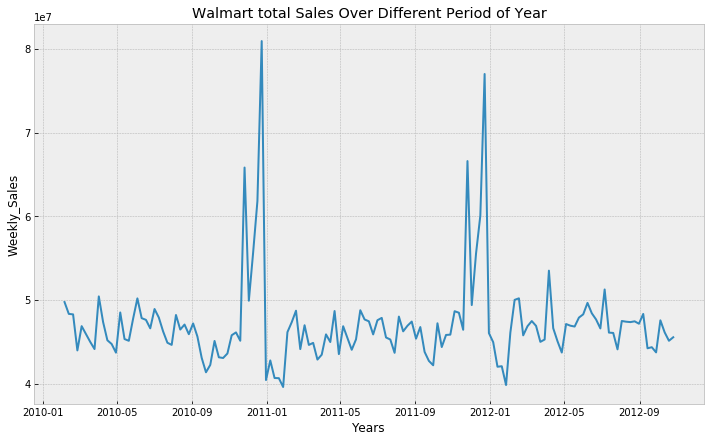

In [15]:
plt.figure(figsize=(12, 7))
plt.plot(sales)
plt.title("Walmart total Sales Over Different Period of Year")
plt.xlabel('Years')
plt.ylabel('Weekly_Sales')
plt.show()
plt.close(0)

**--------------------------------------------------------------------------------------------------------------**

**Visualisation of how Weekly sales varies over the years for some 1st 10 Stores**
* Create a user defind function to plot 'n' number of store's target feature (Weekly_Sales) with time
* Call the function with (DataSet, Store Number, Target Feature)

In [16]:
# user defind function to create plot for 'n' number of store's target feature (Weekly_Sales) with time

def plot_target(df, store, target, dpi=100):
    plt.figure(0,figsize=(15,7), dpi=dpi)
    for i in store:
        namemag = str('Store_'+str(i))
        try:
            df2 = df.get_group(i)[target].set_index('Date')
            plt.plot(df2.index,df2['Weekly_Sales'],label=namemag)# #, color='tab:red')
        except:
            pass
        plt.gca().set(xlabel='Date', ylabel='Weekly_Sales', title= 'Weekly Sales for '+str(len(store))+" Stores")
    plt.legend()
    plt.show()
    plt.close(0)
    


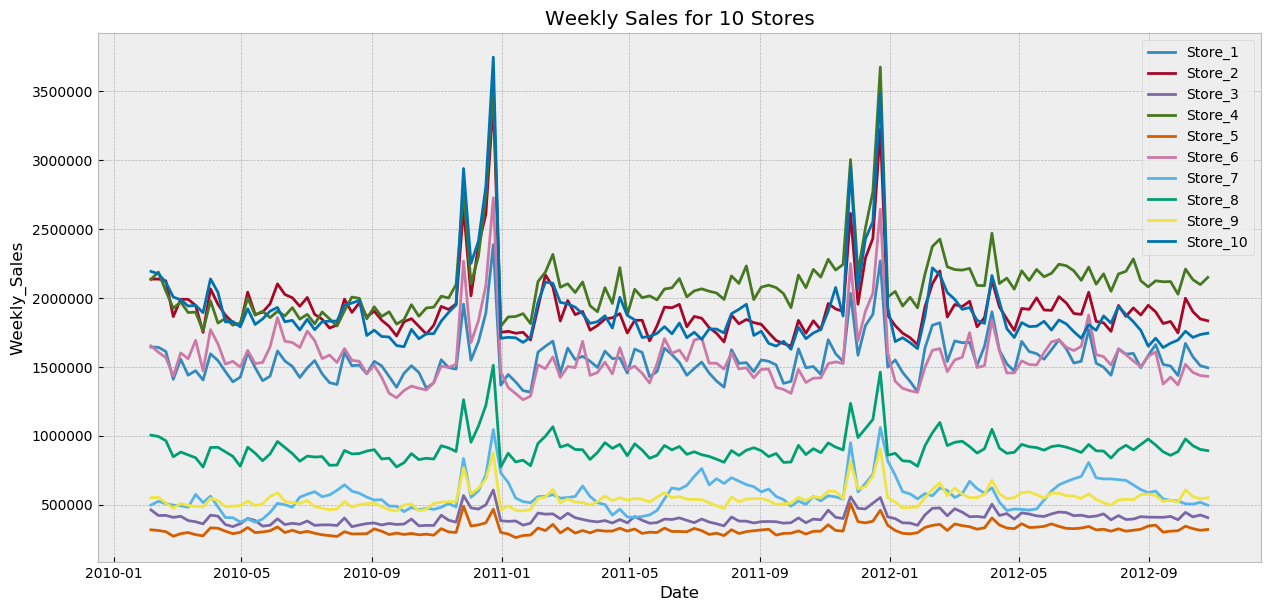

In [17]:
# creating a list of store numbers
storeList = list(range(1,11))

# group the data by store number
walmart_strYrlySale = walmart_data.groupby('Store')

# plot weekly sale for First 10 store  with time
plot_target(walmart_strYrlySale,storeList,['Date','Weekly_Sales'])


**###########################################################################################################**

### 1.3  Which store/s has good quarterly growth rate in Q3’2012

Formula which is used for Growth Rate caculation is:

**Growth Rate = (((Present - Past)/Past)*100)**

For Q3,2012 Growth Rate calculation of each store, below steps are used
* Extract all the sales data from Q3,2012.
* Group them based on store.
* Calculate Growth Rate for each store by **"DataFrame.pct_change()"**
    * This will calculate Growth Rate for each week of Q3,2012 
* Calculate the Average Growth Rate for a store in Q3,2012
* Find the store which has Max Average Growth Rate in Q3,2012
* Find the store which has (+ve) Average Growth Rate in Q3,2012


In [18]:
#extract only the sales of 2012, Q3 of each store
walmart_Q3_2012 = walmart_data[((walmart_data["Year"] == 2012) & (walmart_data["Quarter"]==3))][['Date','Store','Month','Weekly_Sales']]

#walmart_Q3_2012.set_index('Date',drop=True,inplace=True)

walmart_Q3_2012.head()


,Date,Store,Month,Weekly_Sales
126,2012-07-06,1,7,1769854.16
127,2012-07-13,1,7,1527014.04
128,2012-07-20,1,7,1497954.76
129,2012-07-27,1,7,1439123.71
130,2012-08-03,1,8,1631135.79


In [19]:
# group the sales data of Q3,2012 by "Store"

group = walmart_Q3_2012.groupby('Store')

# Visualising the output for 1 store
# Calculate the Weekly Sales Growth percentage for Store 1. 
# DataFrame.pct_change() --> Percentage change between the current and a prior element.

df_1 = group.get_group(1)           # getting the store 1 
df_1['Growth Rate(%)'] = (df_1['Weekly_Sales'].pct_change().fillna(0)) * 100  # 1st value of Growth Rate = "NaN" filled with 0 
df_1.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Date,Store,Month,Weekly_Sales,Growth Rate(%)
126,2012-07-06,1,7,1769854.16,0.000000
127,2012-07-13,1,7,1527014.04,-13.720911
128,2012-07-20,1,7,1497954.76,-1.903013
129,2012-07-27,1,7,1439123.71,-3.927425
130,2012-08-03,1,8,1631135.79,13.342291


In [20]:
#count the total store 
storeCnt = walmart_Q3_2012['Store'].max()

# Create a Data Frame of "Store" and "Avg Growth Rate" of all the store in Q3,2012
store_list = []
growth_rate = []
for i in range(1, storeCnt+1):
    df = group.get_group(i)
    store_list.append(i)
    growth_rate.append((df['Weekly_Sales'].pct_change().fillna(0).mean())*100) 
    
Growth_df = pd.DataFrame({"Store":store_list, "Avg Growth Rate(%)": growth_rate})
Growth_df.head()

,Store,Avg Growth Rate(%)
0,1,-1.371221
1,2,-1.073317
2,3,-0.300591
3,4,-0.631111
4,5,-0.562821


In [21]:
#finding the maximum average growth rate index in Q3,2012
mxGrIdx = Growth_df['Avg Growth Rate(%)'].idxmax()

print(" Store number {} has the highest Avg Growth Rate in Q3,2012: {:.3f}%".format(Growth_df['Store'][mxGrIdx],Growth_df['Avg Growth Rate(%)'][mxGrIdx]))


 Store number 17 has the highest Avg Growth Rate in Q3,2012: 0.292%


In [22]:
# Stores which has the +ve Avg Growth Rate in Q3,2012
Growth_df[Growth_df['Avg Growth Rate(%)'] >0]

,Store,Avg Growth Rate(%)
16,17,0.291982
36,37,0.147960
43,44,0.003980


**Store 17 has maximum Avg Growth Rate of 0.292% in Q3,2012 and  Store numbers (17,37,44) has +ve Avg Growth Rate in Q3,2012**

**###########################################################################################################**

### 1.4   Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

* Created different data set having "Holiday" flag 1 and "Holiday" flag 0.
* Also created different dataset comprising of different types of holiday for future purpose if required for analysis
* Calculating the mean sales in non-holiday season.
* Calculating the different holiday weeks sales in all store.
* Comparing the Holiday weeks sales with that year's Q2 mean sales as Q2 is Non-Holiday season

In [23]:
# Stores Holiday Sales
stores_holiday_sales = walmart_data[walmart_data['Holiday_Flag'] == 1]

# Stores Weekday Sales
stores_nonholiday_sales = walmart_data[walmart_data['Holiday_Flag'] == 0]


# Stores Sales in Super Bowl Day 
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

stores_holiday_sales_superBowl = stores_holiday_sales[(stores_holiday_sales['Date'] == pd.to_datetime('12-Feb-10')) |(stores_holiday_sales['Date'] == pd.to_datetime('11-Feb-11'))|(stores_holiday_sales['Date'] == pd.to_datetime('10-Feb-12'))|(stores_holiday_sales['Date'] == pd.to_datetime('8-Feb-13'))]

# Stores Sales in Labour Day 
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

stores_holiday_sales_labourDay = stores_holiday_sales[(stores_holiday_sales['Date'] == pd.to_datetime('10-Sep-10')) |(stores_holiday_sales['Date'] == pd.to_datetime('9-Sep-11'))|(stores_holiday_sales['Date'] == pd.to_datetime('7-Sep-12'))|(stores_holiday_sales['Date'] == pd.to_datetime('6-Sep-13'))]


# Stores Sales in Thanks Giving 
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

stores_holiday_sales_thanksgiving = stores_holiday_sales[(stores_holiday_sales['Date'] == pd.to_datetime('26-Nov-10')) |(stores_holiday_sales['Date'] == pd.to_datetime('25-Nov-11'))|(stores_holiday_sales['Date'] == pd.to_datetime('23-Nov-12'))|(stores_holiday_sales['Date'] == pd.to_datetime('29-Nov-13'))]


# Stores Sales in Christmas
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

stores_holiday_sales_Christmas = stores_holiday_sales[(stores_holiday_sales['Date'] == pd.to_datetime('31-Dec-10')) |(stores_holiday_sales['Date'] == pd.to_datetime('30-Dec-11'))|(stores_holiday_sales['Date'] == pd.to_datetime('28-Dec-12'))|(stores_holiday_sales['Date'] == pd.to_datetime('27-Dec-13'))]



**Note:** *Non-Holiday season is Quarter_2 as per the holiday list. So the mean sales in non-holiday season of all store is assumed as  **"Mean sales of all stores in Q2 each year"** .*

In [24]:
# Q2_2010 Mean sales 
years = list(set(walmart_data['Year']))                        # getting all the years

stores_nonholiday_sales_meanQ2 = {}                            # empty dictionary to store {year:mean}

sales_groupByYear = stores_nonholiday_sales.groupby(['Year'])  # Group the nonholiday data by year

# getting data for a particular year and calulating mean of each year Q2 sales
for i in years:
    stores_nonholiday_sales_year = sales_groupByYear.get_group(i) 
    stores_nonholiday_sales_meanQ2[i] = stores_nonholiday_sales_year[stores_nonholiday_sales_year['Quarter']==2]['Weekly_Sales'].mean()

#view each year Q2 (non-holiday season) mean sales
for i in years:
    print("Quarter 2 sales mean for Year {} : {:.4f}".format(i,stores_nonholiday_sales_meanQ2[i]))

Quarter 2 sales mean for Year 2010 : 1043366.6235
Quarter 2 sales mean for Year 2011 : 1022133.4262
Quarter 2 sales mean for Year 2012 : 1056919.1704


In [25]:
# holiday sales grouped by date 
# calculating sum of sales on that particular day in all stores

stores_holiday_sales_sum = stores_holiday_sales.groupby(['Date']).agg({'Weekly_Sales':'sum'}).reset_index()
stores_holiday_sales_sum.rename(columns={"Weekly_Sales":"Weekly_Sum_Sales"},inplace=True)

stores_holiday_sales_sum.head()

,Date,Weekly_Sum_Sales
0,2010-02-12,48336677.63
1,2010-09-10,45634397.84
2,2010-11-26,65821003.24
3,2010-12-31,40432519.00
4,2011-02-11,47336192.79


In [26]:
print("Below are the dates where Holiday Sales is greater than Mean sales in Non-Holiday Season :\n")

# iterating  over each row in "stores_holiday_sales_sum" 
# to check if Holiday sale is higher than mean sale of Q2 of that year

for row in stores_holiday_sales_sum.itertuples():
    holiday_year = row.Date.year                          # getting the year from Date column
    
    if(row.Weekly_Sum_Sales > stores_nonholiday_sales_meanQ2[holiday_year]):
        print("Holiday Date\t\t: {}".format(row.Date))
        print("Total Sales on the day\t: {:.4f}".format(row.Weekly_Sum_Sales))
    print("")


Below are the dates where Holiday Sales is greater than Mean sales in Non-Holiday Season :

Holiday Date		: 2010-02-12 00:00:00
Total Sales on the day	: 48336677.6300

Holiday Date		: 2010-09-10 00:00:00
Total Sales on the day	: 45634397.8400

Holiday Date		: 2010-11-26 00:00:00
Total Sales on the day	: 65821003.2400

Holiday Date		: 2010-12-31 00:00:00
Total Sales on the day	: 40432519.0000

Holiday Date		: 2011-02-11 00:00:00
Total Sales on the day	: 47336192.7900

Holiday Date		: 2011-09-09 00:00:00
Total Sales on the day	: 46763227.5300

Holiday Date		: 2011-11-25 00:00:00
Total Sales on the day	: 66593605.2600

Holiday Date		: 2011-12-30 00:00:00
Total Sales on the day	: 46042461.0400

Holiday Date		: 2012-02-10 00:00:00
Total Sales on the day	: 50009407.9200

Holiday Date		: 2012-09-07 00:00:00
Total Sales on the day	: 48330059.3100



**###########################################################################################################**

### 1.5 Provide a monthly and semester view of sales in units and give insights

In [27]:
# extract out the time-series and sales data per week

sales_week = walmart_data.groupby('Date')['Weekly_Sales'].sum()
sales_week.head()

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

**For sales data analysis we have considered the below points:**
* To get Monthly Sales insights we have considered approx 4 weeks in a Month
* To get Quarterly Sales insights we have considered approx 13 weeks in a Quarter 
* To get Semister Sales insights we have considered approx 26 weeks in a Semister 
* To get Yearly Sales insights we have considered approx 52 weeks in a Year 

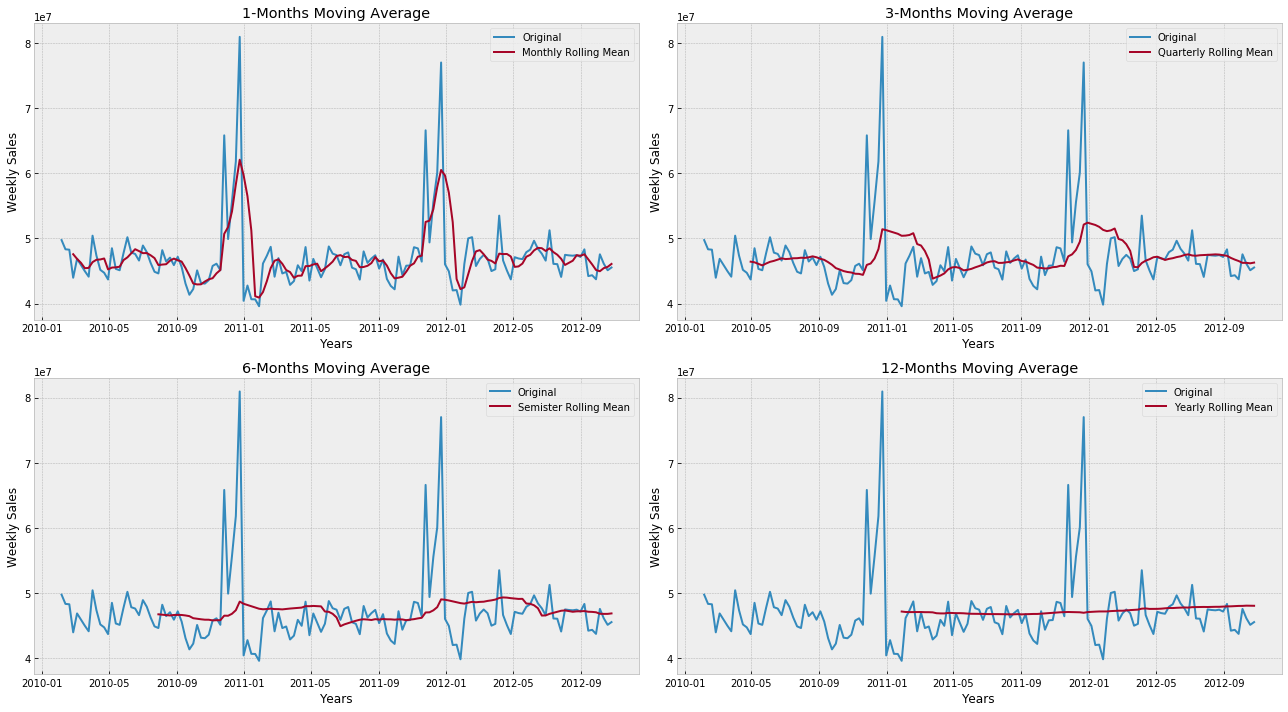

In [28]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(18)
fig.set_figheight(10)
#style.use('bmh')

axes[0][0].plot(sales_week.index, sales_week, label='Original')
axes[0][0].plot(sales_week.index, sales_week.rolling(window=4).mean(), label='Monthly Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Weekly Sales")
axes[0][0].set_title("1-Months Moving Average")
axes[0][0].legend(loc='best')


axes[0][1].plot(sales_week.index, sales_week, label='Original')
axes[0][1].plot(sales_week.index, sales_week.rolling(window=13).mean(), label='Quarterly Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Weekly Sales")
axes[0][1].set_title("3-Months Moving Average")
axes[0][1].legend(loc='best')


axes[1][0].plot(sales_week.index, sales_week, label='Original')
axes[1][0].plot(sales_week.index, sales_week.rolling(window=26).mean(), label='Semister Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Weekly Sales")
axes[1][0].set_title("6-Months Moving Average")
axes[1][0].legend(loc='best')


axes[1][1].plot(sales_week.index, sales_week, label='Original')
axes[1][1].plot(sales_week.index, sales_week.rolling(window=52).mean(), label='Yearly Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Weekly Sales")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')


plt.tight_layout()
plt.show()

As we could see in the above plots, 12-month moving average produces wrinkle free curve as desired. This on some level is expected since we are using month-wise data for our analysis and there is expected monthly-seasonal effect in our data.

* For Monthly sales the average sales goes up during November to January and it is in peak at January. And around February-March it's average sale value is lowest. 
* For a Semister (6 months) sales, the average sales almost wrinkle free. 
    * But due to Novemebr to January high peak season, average sale is also little higher side considering 6 month average. 
    * The effect of February-March lowest sale, comes into picture in July-August month for a 6 month average.

**--------------------------------------------------------------------------------------------------------------**

#### 1.5.1 Seasonality – Time Series Decomposition (Monthly View)

The first thing to do is to see how weekly sales vary on a month basis. We will plot a stacked annual plot to observe seasonality in our data.

In [29]:
# Create a pivot table of Mean Sales per 'Month' in each 'Year'
monthly_pivot = pd.pivot_table(walmart_data, values = "Weekly_Sales", columns = "Year", index = "Month",aggfunc=np.mean)
monthly_pivot

Year,2010,2011,2012
Month,,,
1,NaN,9.094665e+05,9.383026e+05
2,1.057405e+06,1.035174e+06,1.067020e+06
3,1.010666e+06,9.964247e+05,1.028932e+06
4,1.028499e+06,1.006784e+06,1.049561e+06
5,1.037283e+06,1.009156e+06,1.048703e+06
6,1.068034e+06,1.054297e+06,1.069379e+06
7,1.033689e+06,1.021828e+06,1.041719e+06
8,1.042445e+06,1.047774e+06,1.052670e+06
9,9.848216e+05,9.815455e+05,1.003586e+06


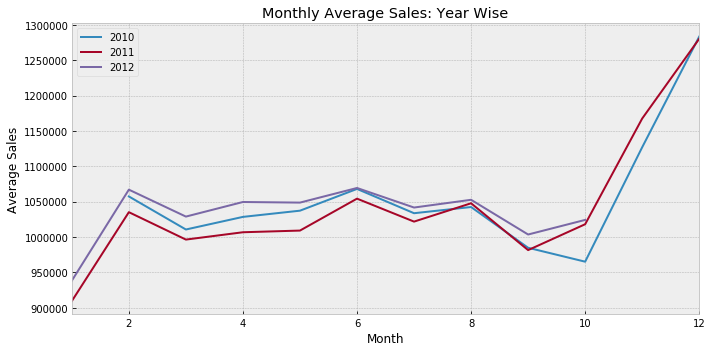

In [30]:
# plot monthly average sales data of each year
monthly_pivot.plot(figsize=(10,5))
plt.title('Monthly Average Sales: Year Wise')
plt.ylabel('Average Sales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

From the above figure we see:
* From October the Sales increases due to Holiday Seasson in November (Thanksgiving)and December (Christmas)
* Even though there is a holiday season in September (Labour Day), that doesn't have much impact on sales. 

**--------------------------------------------------------------------------------------------------------------**

#### 1.5.2 Seasonality – Time Series Decomposition (Quarterly View)

In [31]:
# Create a pivot table of Mean Sales per 'Quarter' in each 'Year'
quarterly_pivot = pd.pivot_table(walmart_data, values = "Weekly_Sales", columns = "Year", index = "Quarter",aggfunc=np.mean)
quarterly_pivot

Year,2010,2011,2012
Quarter,,,
1,1.034036e+06,9.803551e+05,1.012765e+06
2,1.043367e+06,1.022133e+06,1.056919e+06
3,1.021347e+06,1.014855e+06,1.034198e+06
4,1.125041e+06,1.164960e+06,1.024232e+06


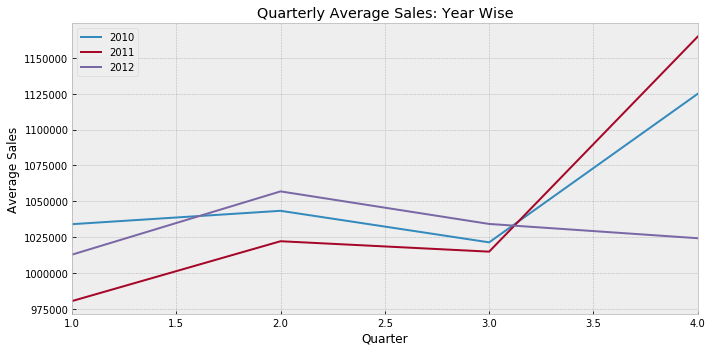

In [32]:
# plot Quarterly average sales data of each year
quarterly_pivot.plot(figsize=(10,5))
plt.title('Quarterly Average Sales: Year Wise')
plt.ylabel('Average Sales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

From the above figure, we can have below understanding:
* In year 2010 and 2011 the sales increase unexpectedly in Quarter 4.
    * Quarter 4 Sales in 2012 doesn't represented properly, since we have data till "2012-10-26"  and in monthly view we see sales goes up only after October.
* In 3rd quarter Sales is lowest.


**###########################################################################################################**

## 2. Statistical Model

### For Store 1 – Build  prediction models to forecast demand

In [33]:
# create DataFrame with only Store 1 data

walmart_Store1 = walmart_data[walmart_data['Store'] == 1]
walmart_Store1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,DayOfWeek
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1,2,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1,2,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,2,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,2,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1,3,4


**--------------------------------------------------------------------------------------------------------------**

### 2.1 Hypothesize if CPI, Unemployment, and Fuel_Price have any impact on sales. 

In [34]:
# Correlation matrix to see how "Weekly_Sales" 
walmart_Store1_cor = walmart_Store1[['Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Quarter']]
walmart_Store1_cor.corr()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
Weekly_Sales,1.000000,0.194905,-0.222701,0.124592,0.225408,-0.097955,0.135004
Holiday_Flag,0.194905,1.000000,-0.200543,-0.085903,-0.028919,0.082949,0.081363
Temperature,-0.222701,-0.200543,1.000000,0.228493,0.118503,-0.180695,0.251412
Fuel_Price,0.124592,-0.085903,0.228493,1.000000,0.755259,-0.513944,-0.101215
CPI,0.225408,-0.028919,0.118503,0.755259,1.000000,-0.813471,0.046924
Unemployment,-0.097955,0.082949,-0.180695,-0.513944,-0.813471,1.000000,0.011486
Quarter,0.135004,0.081363,0.251412,-0.101215,0.046924,0.011486,1.000000


From the above Correlation Matrix we see: 
* CPI and Fuel_Price has a (+ve) correlation with Weekly_Sales
* Temperature and Unemployment has (-ve) correlation with Weekly Sales. 
    * Unemployment has some effect in sales but it is less.
    
We will see in the below visual plots for better understanding.

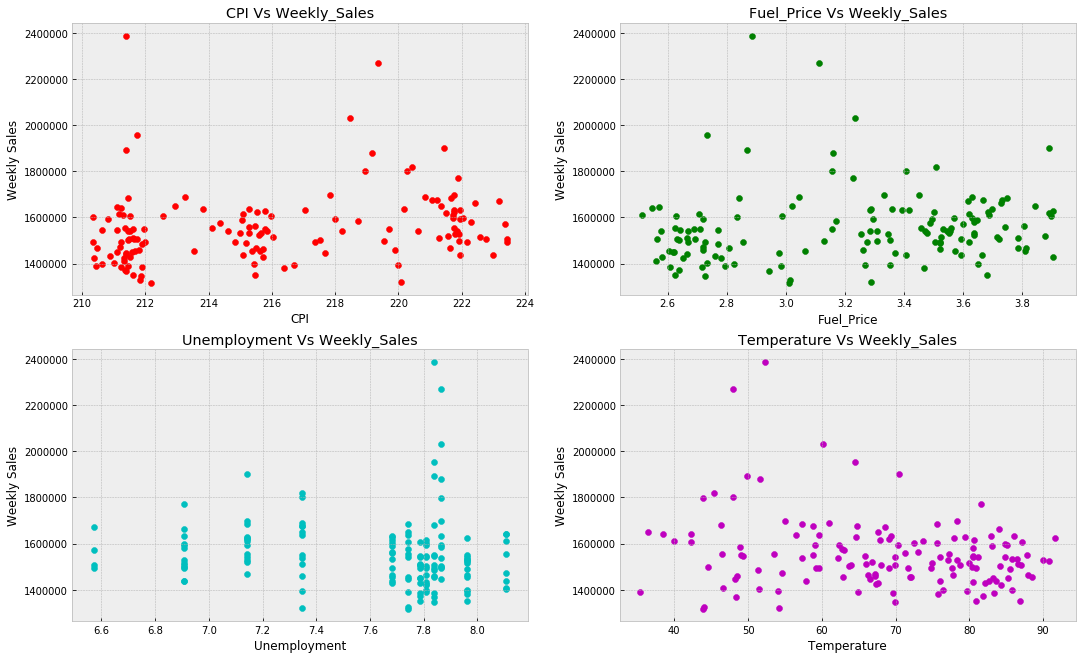

In [35]:
# Plotting  'Weekly_Sales' against 'CPI', 'Fuel_Price', 'Unemployment', 'Temperature'

fig, axes = plt.subplots(2, 2)
fig.set_figwidth(18)
fig.set_figheight(11)

# plotting CPI Vs Weekly_Sales
plt.subplot(2, 2,1)
plt.scatter(walmart_Store1_cor['CPI'], walmart_Store1_cor['Weekly_Sales'],c='r')
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.title("CPI Vs Weekly_Sales")

# plotting Fuel_Price Vs Weekly_Sales
plt.subplot(2, 2,2)
plt.scatter(walmart_Store1_cor['Fuel_Price'], walmart_Store1_cor['Weekly_Sales'],c='g')
plt.xlabel("Fuel_Price")
plt.ylabel("Weekly Sales")
plt.title("Fuel_Price Vs Weekly_Sales")

# plotting Unemployment Vs Weekly_Sales
plt.subplot(2, 2,3)
plt.scatter(walmart_Store1_cor['Unemployment'], walmart_Store1_cor['Weekly_Sales'],c='c')
plt.xlabel("Unemployment")
plt.ylabel("Weekly Sales")
plt.title("Unemployment Vs Weekly_Sales")

# plotting Temperature Vs Weekly_Sales
plt.subplot(2, 2,4)
plt.scatter(walmart_Store1_cor['Temperature'], walmart_Store1_cor['Weekly_Sales'],c='m')
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Temperature Vs Weekly_Sales")

#plt.tight_layout()
plt.show()

* More higher value datapoints are spread when 'CPI' and 'Fuel_Price' is in Higher Side.
    * Positive Correlation
    * Also data points are spread across X axis, which give an indication, that this feature can be used in Regression model.
    * .    
* Unemployment rate has very less and Negative correlation. 
    * Maximum and Minimum value of Unemployment is 14.31299 and 3.878999. Both does not have much higher value of sales, so not represented here. 
    * Maximum sales happend when Unemployment rate is around 7.6 to 8.15. 
    * If we take ((14.31299 - 3.878999) / 2) = 9.096. The middle point of Unemployment. 
    * But more sales is seen when Unemployment < 9.096.
    * Negative Correlation
    * Also the data points are not spread across X axis and it is stacked in partcular X axis value. This give a good indication, that this feature will not contribute to proper regression line.


**###########################################################################################################**

### 2.2. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order)

**Model 1: Simple Linear Regression**

In [36]:
walmart_Store1_Linear = walmart_Store1[['Date','Year','Weekly_Sales']]
walmart_Store1_Linear.head()

,Date,Year,Weekly_Sales
0,2010-02-05,2010,1643690.90
1,2010-02-12,2010,1641957.44
2,2010-02-19,2010,1611968.17
3,2010-02-26,2010,1409727.59
4,2010-03-05,2010,1554806.68


In [37]:
date_obj = walmart_Store1_Linear[['Date']]
date_obj.index +=1                                     # Increament date index by 1, index starts from 1

walmart_Store1_Linear['Date_Index'] =  date_obj.index  # Creating a new column with the index   

walmart_Store1_Linear.head()                           # View the modifed data. 

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Date,Year,Weekly_Sales,Date_Index
0,2010-02-05,2010,1643690.90,1
1,2010-02-12,2010,1641957.44,2
2,2010-02-19,2010,1611968.17,3
3,2010-02-26,2010,1409727.59,4
4,2010-03-05,2010,1554806.68,5


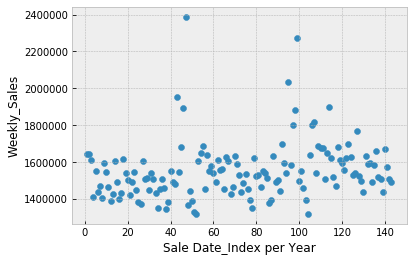

In [38]:
plt.scatter(walmart_Store1_Linear['Date_Index'],walmart_Store1_Linear['Weekly_Sales'])
plt.xlabel('Sale Date_Index per Year')
plt.ylabel('Weekly_Sales')
plt.show()

Highest Date_Index number is the last Sale date of that year. See the sales distribution via **sns.pairplot()**.

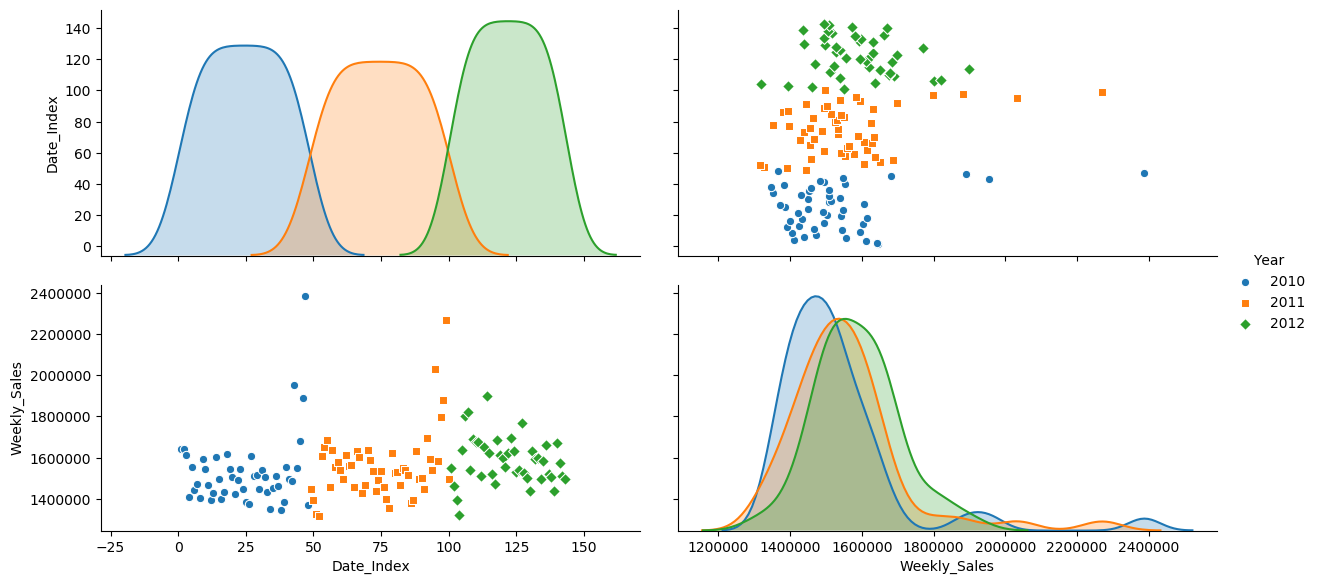

In [39]:
style.use('default')
sns.pairplot(walmart_Store1_Linear,vars=['Date_Index','Weekly_Sales'],hue="Year",aspect=2,height=3,markers=["o","s","D"])
plt.show()

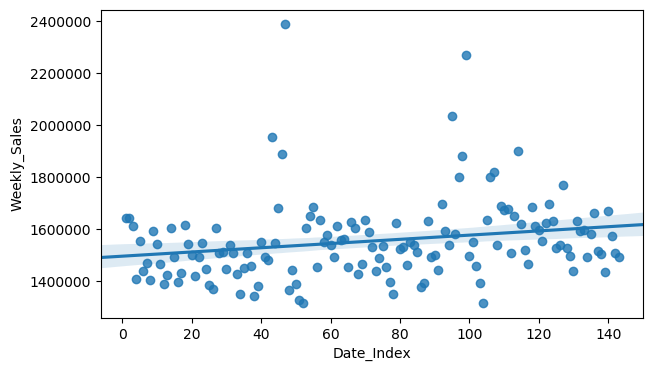

In [40]:
# Create simple regression plot between 'Date_Index' and 'Weekly_Sales'
style.use('default')
plt.figure(figsize=(7, 4))
sns.regplot(x="Date_Index", y="Weekly_Sales", data=walmart_Store1_Linear)

plt.show()

In [41]:
# Extract the feature and target variable
X_feature = walmart_Store1_Linear[['Date_Index']]
y_target = walmart_Store1_Linear['Weekly_Sales']

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X_feature,y_target,random_state=10)

print("X training size: {}\nY training size: {}".format(X_train.shape,y_train.shape))
print("X test size: {}\nY test size: {}".format(X_test.shape,y_test.shape))

X training size: (107, 1)
Y training size: (107,)
X test size: (36, 1)
Y test size: (36,)


In [42]:
# create and Linear Regression Estimator
linReg = LinearRegression()

# Train the model by fitting the training data into model estimator
linReg.fit(X_train,y_train)

# Predict the Y response
y_pred = linReg.predict(X_test)

# Print the intercept and coefficients
print("Y intercept: ",linReg.intercept_)
print("Coefficients: ",linReg.coef_)

Y intercept:  1494492.0932235462
Coefficients:  [792.71625128]


In [43]:
# Calculate R-squared value for the model
R2_score = linReg.score(X_test,y_test)
print("R-squared value : {:.2f}".format(R2_score))


# MSE of 'y_test' and 'y_pred'
# RMSE of 'y_test' and 'y_pred'
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE of predicted weekly sals :',mse)
print('RMSE:',np.sqrt(mse))


R-squared value : 0.05
MSE of predicted weekly sals : 20533226857.425835
RMSE: 143294.1968728177


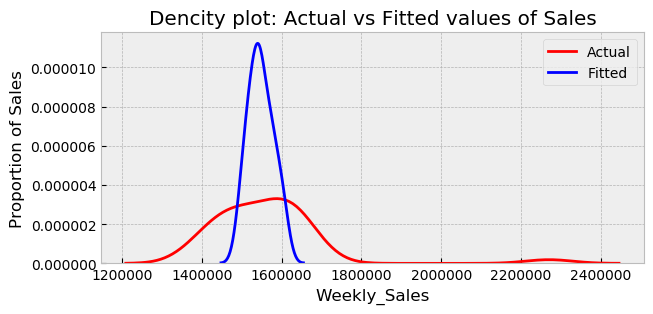

In [44]:
# Create a density plot to analyse the actual vs predicted prices
style.use('bmh')
plt.figure(figsize=(7, 3))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")
sns.distplot(y_pred, hist=False, color="b", label="Fitted",ax=ax1)

plt.title('Dencity plot: Actual vs Fitted values of Sales')
plt.xlabel('Weekly_Sales')
plt.ylabel('Proportion of Sales')

plt.show()
plt.close()

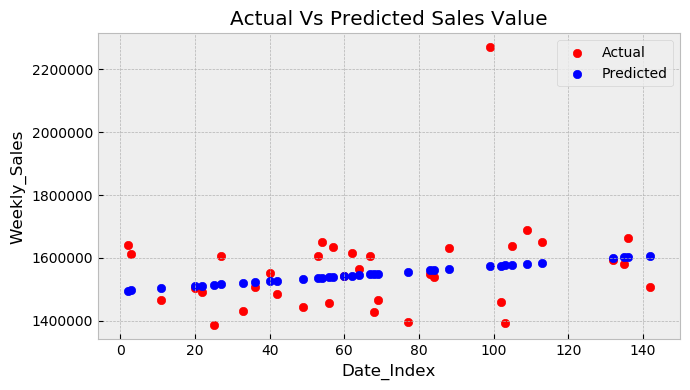

In [45]:
# Scatter plot to see the predicted sales value.
style.use('bmh')
plt.figure(figsize=(7, 4))

plt.scatter(X_test,y_test,c='r', label = 'Actual')
plt.scatter(X_test,y_pred,c='b', label = 'Predicted')

plt.xlabel('Date_Index')
plt.ylabel('Weekly_Sales')
plt.title('Actual Vs Predicted Sales Value')

plt.tight_layout()
plt.legend(loc='best')
plt.show()

**------------------------------------------------------------------------------------------------------------**

**Model 2: Multiple Linear Regression**

In [46]:
# create a separate DataFrame for Store1 data with multiple feature

walmart_Store1_Multi = walmart_Store1[['Date','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Quarter']]
walmart_Store1_Multi.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1
4,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1


In [47]:
date_obj = walmart_Store1_Multi[['Date']]
date_obj.index +=1                                     # Increament date index by 1, index starts from 1

walmart_Store1_Multi['Date_Index'] =  date_obj.index   # Creating a new column with the index   

walmart_Store1_Multi.set_index('Date',inplace=True)
walmart_Store1_Multi.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Date_Index
Date,,,,,,,,
2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1,1
2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,2
2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,3
2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,4
2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1,5


In [48]:
# Extract the feature and target variable
X_multi_feature = walmart_Store1_Multi.drop(columns=['Weekly_Sales'])
y_multi_target = walmart_Store1_Multi['Weekly_Sales']

# Create the list of features
feature_list = X_multi_feature.columns

# create scaler estimator for rescaling X_feature 
scaler = preprocessing.StandardScaler()

#scalling the feature vectors
for feature in feature_list:
    X_multi_feature[feature] = scaler.fit_transform(X_multi_feature[[feature]])

X_multi_feature.head()


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Date_Index
Date,,,,,,,
2010-02-05,-0.274204,-1.830686,-1.521079,-1.130288,1.295958,-1.385591,-1.719981
2010-02-12,3.646917,-2.098280,-1.577441,-1.096657,1.295958,-1.385591,-1.695756
2010-02-19,-0.274204,-1.998285,-1.657288,-1.085823,1.295958,-1.385591,-1.671530
2010-02-26,-0.274204,-1.526473,-1.546911,-1.078788,1.295958,-1.385591,-1.647305
2010-03-05,-0.274204,-1.535627,-1.396612,-1.071754,1.295958,-1.385591,-1.623080


In [49]:

# Split the data
X_trainMulti,X_testMulti,y_trainMulti,y_testMulti = train_test_split(X_multi_feature,y_multi_target,random_state=8)

print("X training size: {}\nY training size: {}".format(X_trainMulti.shape,y_trainMulti.shape))
print("X test size: {}\nY test size: {}".format(X_testMulti.shape,y_testMulti.shape))

X_trainMulti.sort_index(inplace=True)
X_testMulti.sort_index(inplace=True)
y_trainMulti.sort_index(inplace=True)
y_testMulti.sort_index(inplace=True)

X training size: (107, 7)
Y training size: (107,)
X test size: (36, 7)
Y test size: (36,)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
# create and Multiple Linear Regression Estimator
linReg_Multi = LinearRegression()

# Train the model by fitting the training data into model estimator
linReg_Multi.fit(X_trainMulti,y_trainMulti)

# Predict the Y response
y_predMulti = linReg_Multi.predict(X_testMulti)

# Print the intercept and coefficients
print("Y intercept: ",linReg_Multi.intercept_)
print("Coefficients: ",linReg_Multi.coef_)

Y intercept:  1555672.8173616466
Coefficients:  [ 20837.02710693 -50396.43338914  23284.99278233 115762.98454447
   8101.69002087  40035.61592704 -87054.11753066]


In [51]:
# Calculate R-squared value for the Multiple Linear Regression model
R2_score = linReg_Multi.score(X_testMulti,y_testMulti)
print("R-squared value : {:.2f}".format(R2_score))


# MSE of 'y_test' and 'y_pred'
# RMSE of 'y_test' and 'y_pred'
mse = metrics.mean_squared_error(y_testMulti, y_predMulti)
print('MSE of predicted weekly sales :',mse)
print('RMSE:',np.sqrt(mse))

R-squared value : 0.17
MSE of predicted weekly sales : 9547591223.595942
RMSE: 97711.77627899281


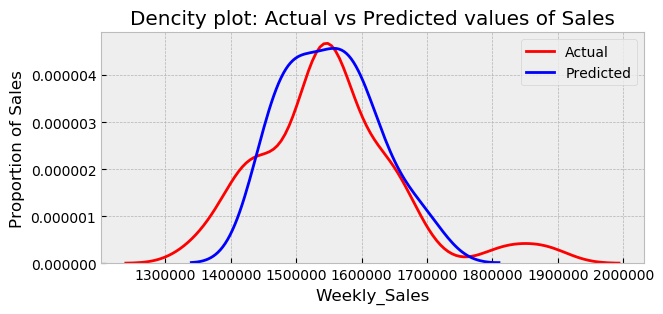

In [52]:
# Create a density plot to analyse the actual vs predicted prices
style.use('bmh')
plt.figure(figsize=(7, 3))

ax1 = sns.distplot(y_testMulti, hist=False, color="r", label="Actual")
sns.distplot(y_predMulti, hist=False, color="b", label="Predicted",ax=ax1)

plt.title('Dencity plot: Actual vs Predicted values of Sales')
plt.xlabel('Weekly_Sales')
plt.ylabel('Proportion of Sales')

plt.show()
plt.close()

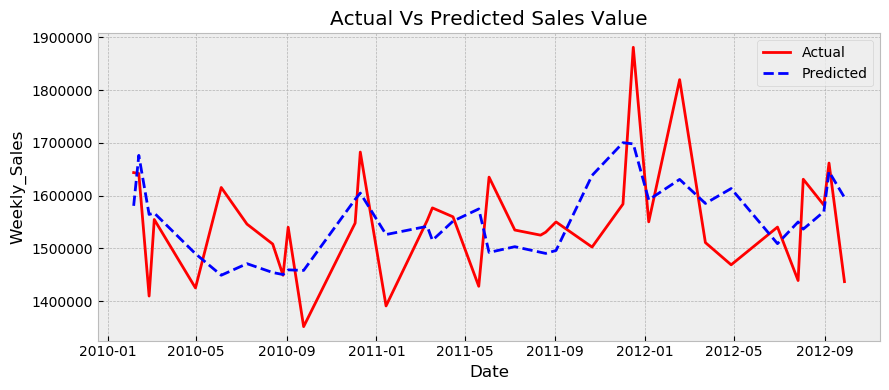

In [53]:
# Scatter plot to see the predicted sales value.
style.use('bmh')
plt.figure(figsize=(9, 4))

plt.plot(y_testMulti.index,y_testMulti,'r',label = 'Actual')
plt.plot(y_testMulti.index,y_predMulti,'b--', label = 'Predicted')

plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Actual Vs Predicted Sales Value')

plt.tight_layout()
plt.legend(loc='best')
plt.show()

**------------------------------------------------------------------------------------------------**

Now we have 2 Model.
1. Simple Linear Regression Model
2. Multiple Linear Regression Model

In both the model we see there is a significant improvement of R-Squared value in case of Multiple Linear regression model.

**Model 1: Simple Linear Regression Model:**
* R-squared value : 0.05
* MSE of predicted weekly sales : 20533226857.425835
* RMSE: 143294.1968728177

**Model 2: Multiple Linear Regression Model**
* R-squared value : 0.17
* MSE of predicted weekly sales : 9547591223.595942
* RMSE: 97711.77627899281


**So from the above 2 Model, Multiple Linear Regression model is better.**




**###########################################################################################################**

### 2.3 Change dates into days by creating new variable

In [54]:
walmart_Store1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,DayOfWeek
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1,2,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1,2,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,2,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,2,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1,3,4


In [55]:
# Convert the sales date into Day Name
walmart_Store1['WeekDay_Name'] = walmart_Store1['Date'].dt.day_name()
walmart_Store1.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,DayOfWeek,WeekDay_Name
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1,2,4,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1,2,4,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,2,4,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,2,4,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1,3,4,Friday


**################################################## End of Project ######################################################**